<a href="https://colab.research.google.com/github/smandiga/Data-Science-/blob/main/HeartStroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [ ]:
#IMPORTING LIBRARIES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#IMPORTING DATA
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#INFO 
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("Features : " , df.columns.tolist())
print ("Missing values : ", df.isnull().sum().values.sum())
print ("Unique values : \n",df.nunique())

Rows     :  5110
Columns  :  12
Features :  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Missing values :  201
Unique values : 
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


## Data Visualization

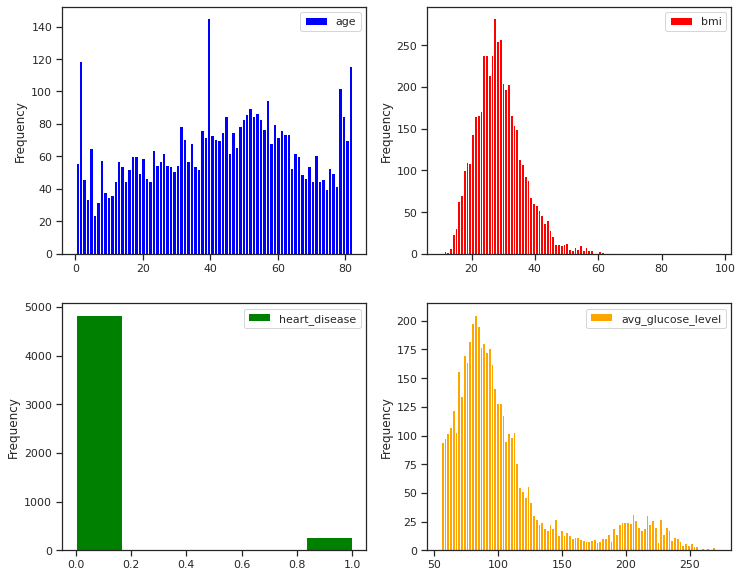

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=80, color="blue", ax=axes[0][0])
df.plot(kind="hist", y="bmi", bins=100, color="red", ax=axes[0][1])
df.plot(kind="hist", y="heart_disease", bins=6, color="green", ax=axes[1][0])
df.plot(kind="hist", y="avg_glucose_level", bins=100, color="orange", ax=axes[1][1])
plt.show()

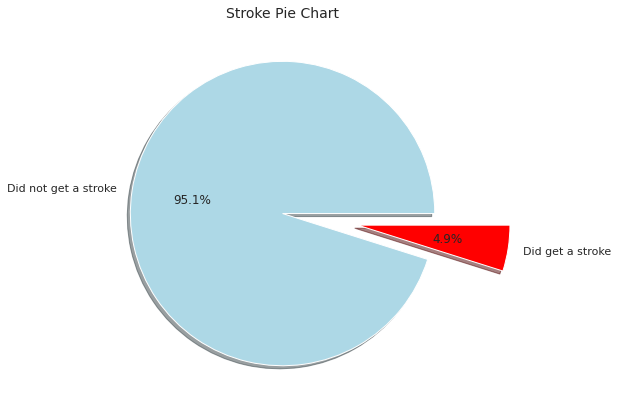

In [ ]:

labels = ['Did not get a stroke','Did get a stroke']
values = df['stroke'].value_counts()
plt.figure(figsize=(7,7))
colors = ["lightblue","red"]
plt.pie(x=values, labels=labels, autopct="%1.1f%%", colors=colors, shadow=True, explode=[0, 0.5])
plt.title("Stroke Pie Chart", fontdict={'fontsize': 14})
plt.show()

The data is strongly imbalanced in this case: We have 4861 patients with target=0 (no stroke), but only 249 (<5%) cases with target=1 (stroke). By using a trivial predictor which always returns 0 we can achieve an accuracy of 4861/5110 = 95.13%. This sounds at first like a good performance, however, this trivial predictor is completely useless as it has absolutely no discriminative power. We can see that accuracy is not a really useful metric in the context of strongly imbalanced data.

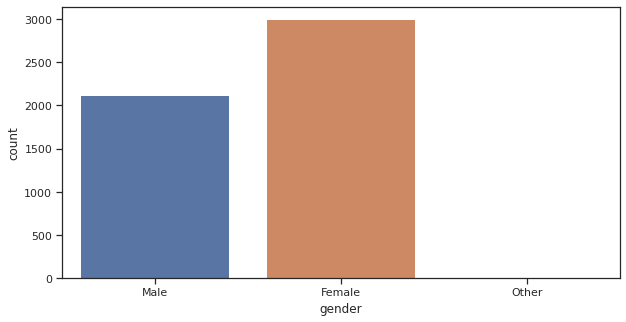

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender');

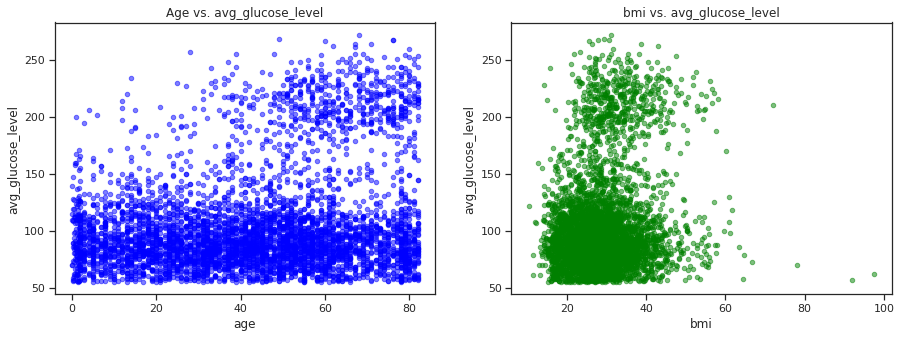

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='blue', ax=axes[0], title="Age vs. avg_glucose_level")
df.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='green', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

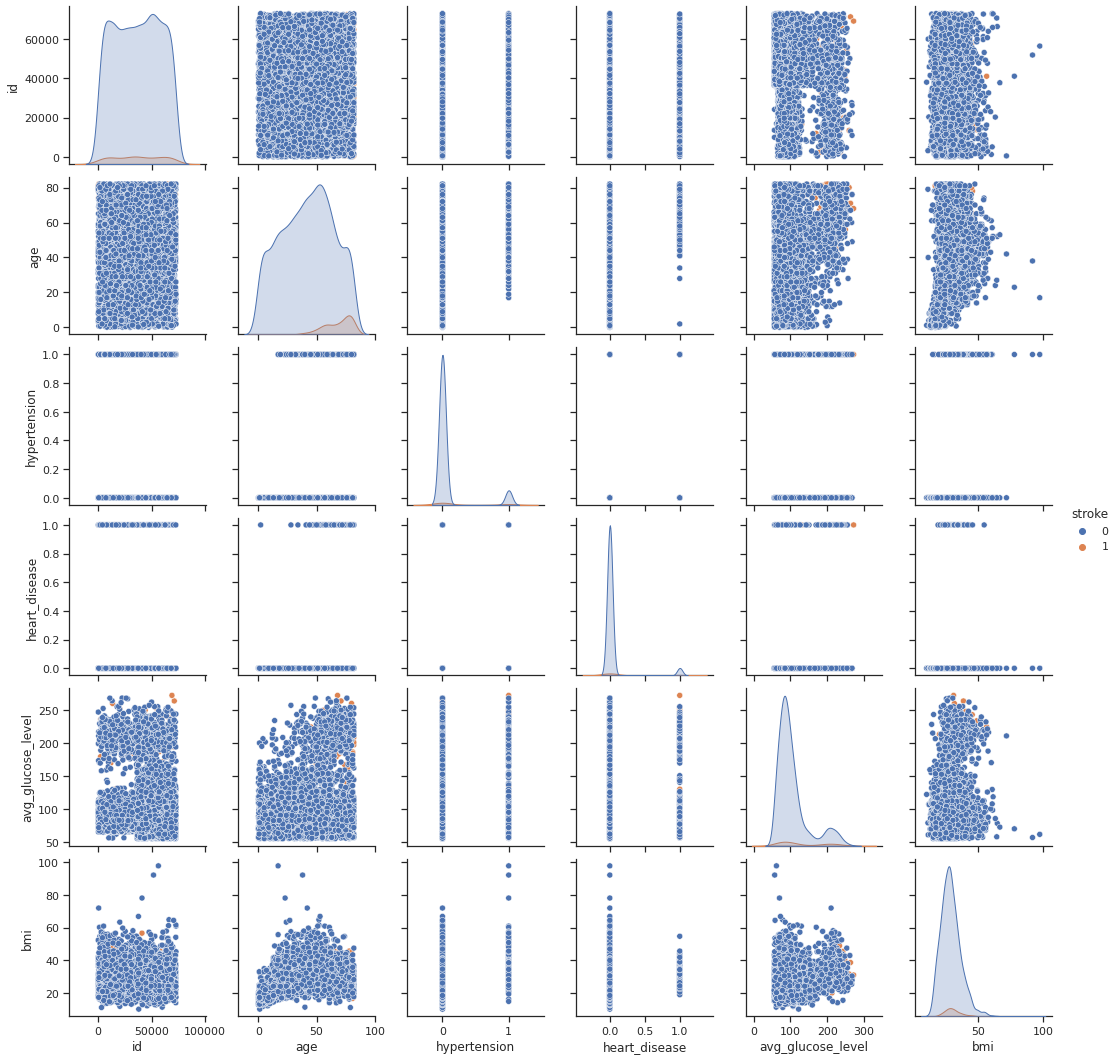

In [ ]:
sns.set(style="ticks");
sns.pairplot(df, hue="stroke")


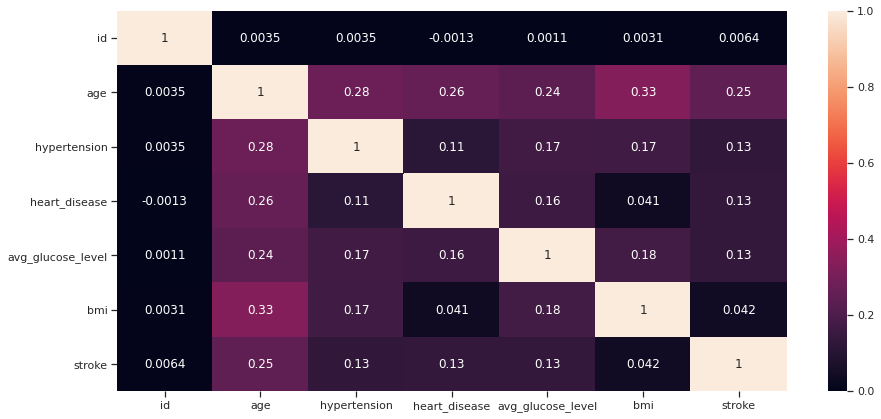

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);




1.   None of the feature has a high correaltion with stroke
2.   BMI has no correlation with stroke





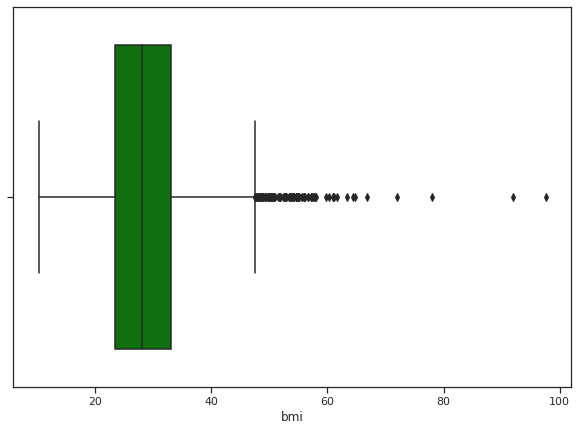

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green');

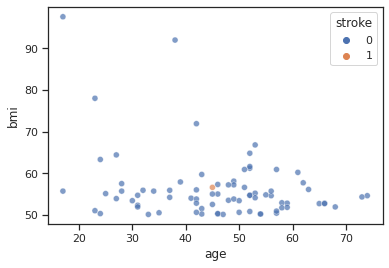

In [ ]:
sns.scatterplot(x=df['age'],y=df['bmi'][df.bmi>50],hue=df['stroke'],alpha=0.7)

In [ ]:
df['stroke'][df.bmi>50].value_counts()

0    78
1     1
Name: stroke, dtype: int64

In [ ]:
df['stroke'][df.bmi.isna()].value_counts()

0    161
1     40
Name: stroke, dtype: int64

In [ ]:
df['bmi'][df.bmi<50].mean()

28.444575569358193

In [ ]:
df['stroke'][df.bmi.isnull()].value_counts()

0    161
1     40
Name: stroke, dtype: int64

### Data Cleaning

In [ ]:
#Filling null values with mean of bmi
df["bmi"] = df["bmi"].fillna(28.4)
#Removing bmi values above 50(outliers)
df["bmi"] = df["bmi"].apply(lambda x: np.nan if x>50 else x)
df.dropna(inplace=True)

In [ ]:
df.shape

(5031, 12)

In [ ]:
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


In [ ]:
cat_df = df[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
summary

stroke                             0    1
gender         Female           2795  140
               Male             1987  108
               Other               1    0
Residence_type Rural            2358  113
               Urban            2425  135
smoking_status Unknown          1476   47
               formerly smoked   802   70
               never smoked     1770   89
               smokes            735   42

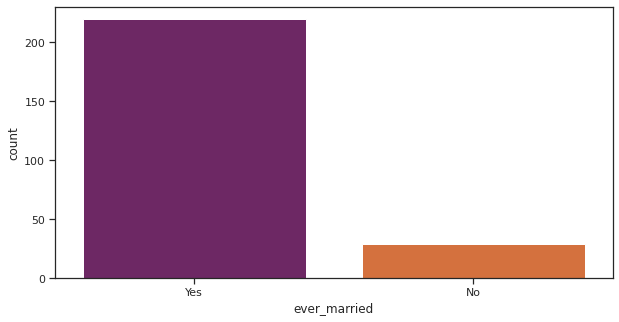

In [ ]:
plt.figure(figsize=(10,5))
strok=df.loc[df['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno');

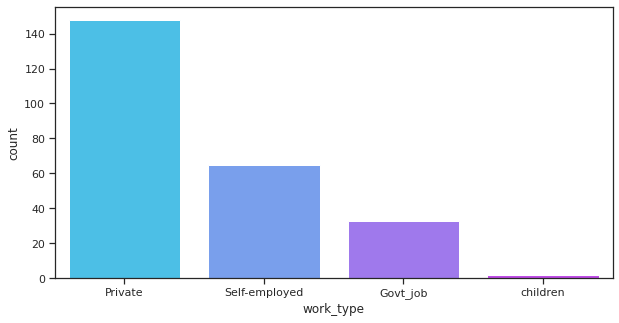

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool');

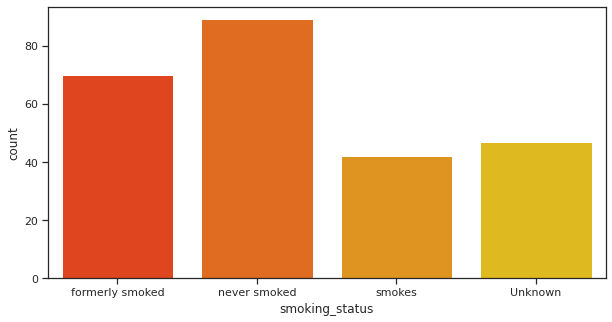

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn');

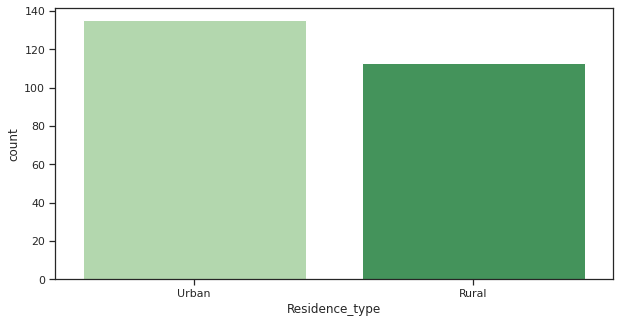

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens');


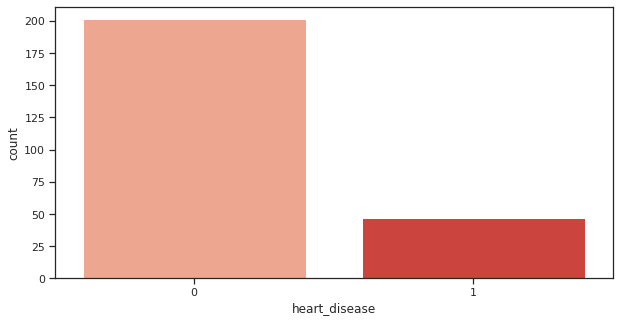

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds');

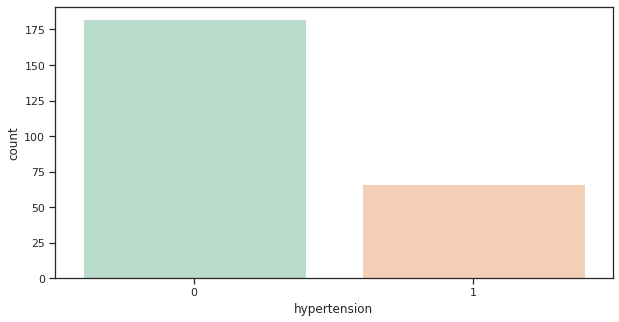

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2');

In [ ]:
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)

 
df = pd.get_dummies(data=df, columns=['smoking_status'],drop_first=True)
df = pd.get_dummies(data=df, columns=['work_type'],drop_first=True)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.4,1,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,1,0,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,1,0,0
4,1665,0,79.0,1,0,1,0,174.12,24.0,1,0,1,0,0,0,1,0


In [ ]:
df=df.drop(columns='id',axis=1)

# Scaling the Data

In [ ]:
std=StandardScaler()
df['avg_glucose_level'] = std.fit_transform(df['avg_glucose_level'].values.reshape(-1,1))
df['bmi'] = std.fit_transform(df['bmi'].values.reshape(-1,1))
df['age'] = std.fit_transform(df['age'].values.reshape(-1,1))

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,1.047754,0,1,1,1,2.729829,1.187473,1,1,0,0,0,1,0,0
1,0,0.783751,0,0,1,0,2.141154,-0.006230,1,0,1,0,0,0,1,0
2,1,1.619759,0,1,1,0,0.000537,0.590621,1,0,1,0,0,1,0,0
3,0,0.255746,0,0,1,1,1.452440,0.867211,1,0,0,1,0,1,0,0
4,0,1.575758,1,0,1,0,1.516687,-0.646753,1,0,1,0,0,0,1,0


##Ready the data for Modelling

In [ ]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
print(X_train.shape)
print(sum(y_train==1))
print(X_test.shape)
print(sum(y_test==1))

(4024, 15)
198
(1007, 15)
50


Accuracy 0.9503475670307845
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       957
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1007
   macro avg       0.48      0.50      0.49      1007
weighted avg       0.90      0.95      0.93      1007



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


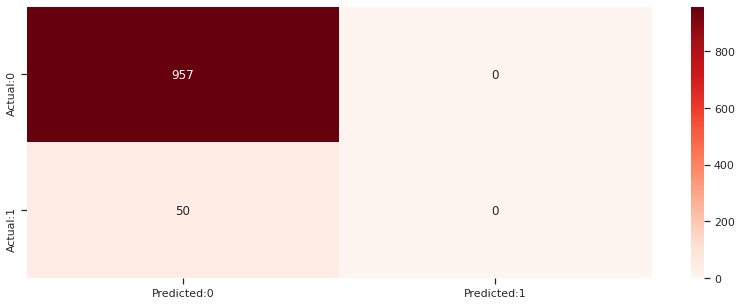

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

#Oversampling y==1 Data

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(sum(y_train==1))
print(sum(y_train==0))

198
3826


In [ ]:
print(sum(y_train_res==1))
print(sum(y_train_res==0))

3826
3826


### *Random Forest with Hyperparameter Tuning*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params={'n_estimators':[10,20,50,100],'criterion':['gini','entropy'],'max_depth':[None,5,10,25,50]}
rf=RandomForestClassifier(random_state=0)
clf=GridSearchCV(rf,param_grid=params,scoring='recall',cv=5,n_jobs=-1)
clf.fit(X_train_res,y_train_res)
print('Best Score:{}'.format(clf.best_score_))
print('Best parameters:{}'.format(clf.best_params_))

Best Score:0.9743801088755781
Best parameters:{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}


Accuracy 0.9265143992055611
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       957
           1       0.17      0.12      0.14        50

    accuracy                           0.93      1007
   macro avg       0.56      0.54      0.55      1007
weighted avg       0.92      0.93      0.92      1007



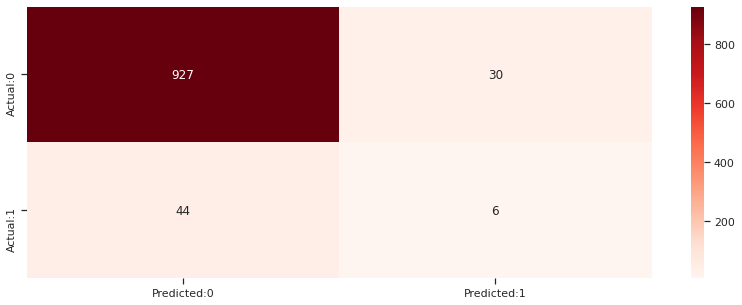

In [ ]:
forest = RandomForestClassifier(n_estimators = 100,criterion='gini',max_depth=None)
forest.fit(X_train_res, y_train_res)
 
y_pred = forest.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

## *Logistic* *Regression*


Accuracy 0.7586891757696127
              precision    recall  f1-score   support

           0       0.99      0.75      0.86       957
           1       0.15      0.84      0.26        50

    accuracy                           0.76      1007
   macro avg       0.57      0.80      0.56      1007
weighted avg       0.95      0.76      0.83      1007



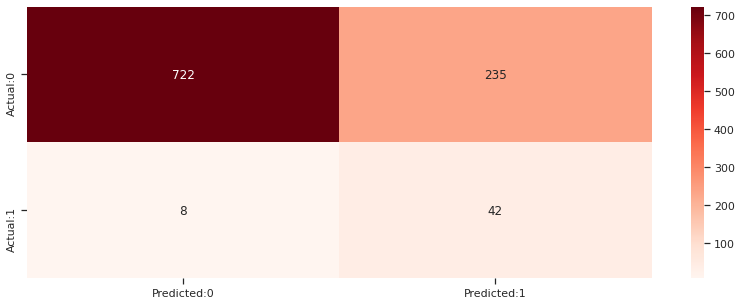

In [ ]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
y_pred= model.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

## Support Vector Machine

SVM Accuracy: 0.7388282025819265
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       957
           1       0.15      0.90      0.25        50

    accuracy                           0.74      1007
   macro avg       0.57      0.82      0.55      1007
weighted avg       0.95      0.74      0.81      1007



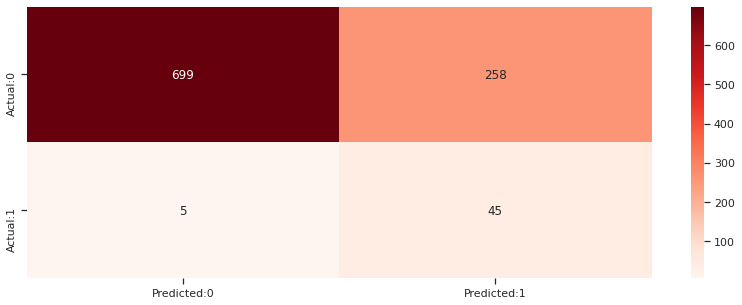

In [ ]:
svc_best =SVC(C=1,degree=3,kernel ='linear',probability=True,random_state=0)
svc_best.fit(X_train_res,y_train_res)
y_pred=svc_best.predict(X_test)
print("SVM Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");


The metric I give more interest is "Recall" rather than accuracy because I don't want the situation like the following:

- "A person is very likely to have a stroke but the model tells he/she doesn't"

Which is a very bad situation. The model will tell us like that when it has low recall (high False Negative rate).
The True Negative situation (model tells that this a person will have a stroke but he/she actually doesn't) is not that bad compared to the first one. 

# Undersampling y==0

In [ ]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(random_state=42)
X_train_res,y_train_res=nm.fit_sample(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(sum(y_train_res==1))
print(sum(y_train_res==0))

198
198


### *Logistic* *Regression*

Accuracy 0.42899702085402186
              precision    recall  f1-score   support

           0       0.97      0.41      0.58       957
           1       0.06      0.78      0.12        50

    accuracy                           0.43      1007
   macro avg       0.52      0.60      0.35      1007
weighted avg       0.93      0.43      0.55      1007



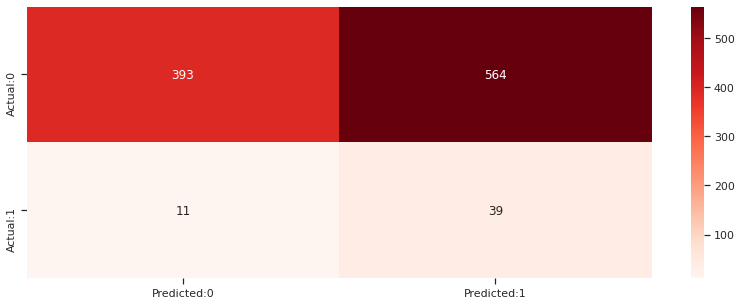

In [ ]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)
y_pred= model.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

### *Random Forest*

Accuracy 0.253227408142999
              precision    recall  f1-score   support

           0       0.97      0.22      0.36       957
           1       0.06      0.88      0.10        50

    accuracy                           0.25      1007
   macro avg       0.51      0.55      0.23      1007
weighted avg       0.93      0.25      0.35      1007



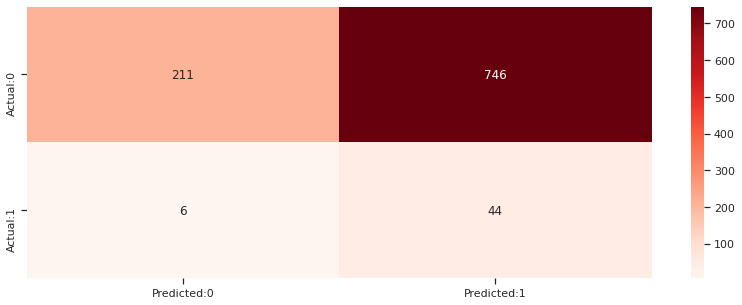

In [ ]:
forest = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_depth=25)
forest.fit(X_train_res, y_train_res)
 
y_pred = forest.predict(X_test)
print("Accuracy", accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");

SVM Accuracy: 0.36643495531281034


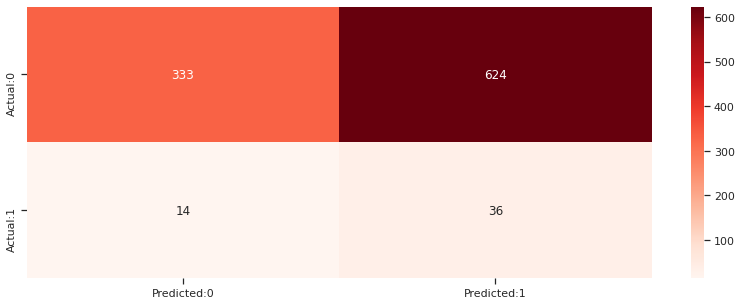

In [ ]:
svc_best =SVC(C=10,degree=3,kernel ='linear',probability=True,random_state=0)
svc_best.fit(X_train_res,y_train_res)
y_pred=svc_best.predict(X_test)
print("SVM Accuracy:",accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14,5))
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Reds");